<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#План-работ" data-toc-modified-id="План-работ-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>План работ</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### План работ

Данные из "Бета-Банка" выглядят следующим образом:

**Признаки**

* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

**Целевой признак**

* Exited — факт ухода клиента

Загрузим необходимые библиотеки, разобьем датасет на три выборки: тренировочную, валидационную и тестовую, в соотношении 60/20/20% от общей, соответственно. Но сначала посмотрим на данные:
* есть ли пропуски
* нужно ли упорядочивать данные
* есть ли диссбаланс классов
* проверить работоспосбность данных для обучения моделей

In [1]:
!pip install imblearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, 
                            confusion_matrix,
                            recall_score,
                            precision_score,
                            f1_score,
                            precision_recall_curve,
                            roc_curve,
                            roc_auc_score
                            )
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/datasets/Churn.csv')

print(data.shape)
display(data.describe().T)
display(data.head())

(10000, 14)


,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


На первый взгляд столбец "RowNumber", "Surname" и "CustomerId" не нужны, так как в первом случае он повтряет индекс таблицы, а во-втором и третьем эти столбцы не несут полеззной информации как признак клиента. 

In [2]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Также в данных есть 909 NaN-значениq столбца "Tenure". 

In [3]:
display(data[data.isna().any(axis=1)])

print(data['Tenure'].unique())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...
9944,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


[ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0. nan]


Удалим строки с пропущенными значениями.

In [4]:
data = data.dropna()

Даллее используем прямое колирование для преобразования данных, так как мы решаем задачу логической регрессии. 

In [5]:
data_ohe = pd.get_dummies(data, drop_first=True)

Разделим данные на три выборки: тренировочную, валидационную и тестовую, в соотношении 60/20/20% от общей, соответственно.

In [6]:
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)

features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_temp, target_temp, test_size=0.5, random_state=12345)

Промасштабируем данные и проведём тестировочное обучение модели, чтобы убедится что нету ошибок

In [7]:
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric]) 
features_test[numeric] = scaler.transform(features_test[numeric]) 

pd.options.mode.chained_assignment = None

display(features_train)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9344,0.809075,-1.039327,2.0,0.554904,1,1,0,0.019508,0,0,0
3796,-1.152518,-1.227561,7.0,0.480609,1,0,0,0.056167,0,0,1
7462,-0.398853,0.090079,9.0,-1.237830,1,1,1,0.848738,0,0,1
1508,-0.749875,-0.286389,6.0,-1.237830,2,1,1,-0.894953,0,0,1
4478,-1.028628,-0.756975,4.0,-1.237830,2,0,1,-1.284516,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4938,1.283988,-0.474624,10.0,0.813031,1,0,0,-1.092767,1,0,1
4529,0.158652,0.466548,8.0,1.071609,1,1,1,0.260842,0,0,0
3866,-1.049276,-0.945210,6.0,0.449165,1,1,1,-1.086965,0,0,0
2414,-0.956359,1.219485,9.0,-1.237830,1,1,0,1.288527,0,0,0


### Выводы

Проведено подготовка данных для дальнейшего исследования и решении задачи, удалены пропуски, проведено прямое кодирование и проведена тестовое обучение модели, следовательно данные подготовлены к использованию.

## Исследование задачи

Проверим данные на дисбаланс таргета

In [8]:
print('Доля фактов уходов клиента: {:.2%}'.format(data_ohe['Exited'].mean()))

Доля фактов уходов клиента: 20.39%


Проверим первые модели логической регрессии, случайного леса и решающего дерева. Попробуем подобрать наилучшие гиперпараметры для этих моделей.

In [9]:
result_ls = []

def best_rf(features_train, target_train, features_valid, target_valid, depth, estimator):
    model_rf = None
    best_f1 = 0
    depth = 13
    estimator = 501
    for d in range(10, depth):
        for e in range(300, estimator, 50):
            model = RandomForestClassifier(random_state=12345,  
                                               max_depth = d,
                                               n_estimators=e)
            model.fit(features_train, target_train)
            predicted_valid = model.predict(features_valid)
            result = f1_score(target_valid, predicted_valid)
            
            if result > best_f1:
                best_f1 = result
                model_rf = model
                best_d = d
                best_e = e
    
    return model_rf, best_d, best_e

def best_dt(features_train, target_train, features_valid, target_valid, depth):
    model_dt = None
    best_f1 = 0
    depth = 13
    for d in range(1, depth):
        model = DecisionTreeClassifier(random_state=12345, max_depth=d)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)

        if result > best_f1:
            best_f1 = result
            model_dt = model
            best_d = d

    return model_dt, best_d
                
def getMetrics(model, features, target):
    predicted = model.predict(features)
    probabilities = model.predict_proba(features)
    probabilities_one = probabilities[:, 1]
    f1 = f1_score(target, predicted)
    auc_roc = roc_auc_score(target, probabilities_one)
    return [f1, auc_roc]

def plotAUC(model, features, target):
    probabilities = model.predict_proba(features)
    probabilities_one = probabilities[:, 1]
    
    precision, recall, thresholds = precision_recall_curve(target, probabilities[:, 1])

    plt.figure(figsize=(6, 6))
    plt.step(recall, precision, where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Кривая Precision-Recall')
    plt.show()

    fpr, tpr, thresholds = roc_curve(target, probabilities_one) 

    plt.figure(figsize=(10, 10))
    plt.plot(fpr, tpr, linestyle='-')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-curve')
    plt.show()
    
def plotResults(list):
    print("AUC = {:.3f} | F1 = {:.3f}".format(list[1], list[0]))

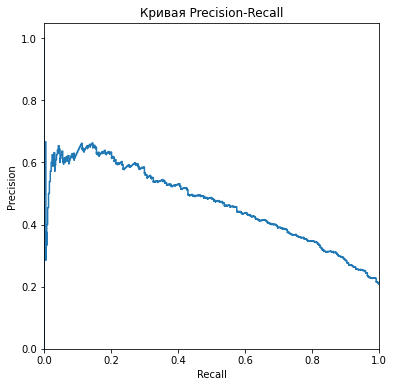

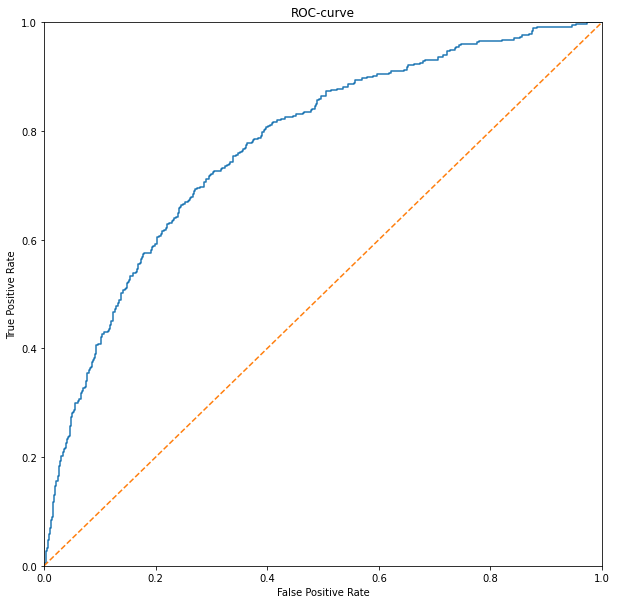

AUC = 0.774 | F1 = 0.304


In [10]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_lr.fit(features_train, target_train)


plotAUC(model_lr, features_valid, target_valid)
plotResults(getMetrics(model_lr, features_valid, target_valid))

result_ls.append(["LogisticRegression", getMetrics(model_lr, features_valid, target_valid)[1], 
                                        getMetrics(model_lr, features_valid, target_valid)[0]])

In [11]:
model_rf, best_d, best_e = best_rf(features_train, target_train, features_valid, target_valid, 13, 501)      

print("Гиперпараметры лучшей модели - Глубина леса = {:.3f}, Количество деревьев = {:.3f}".format(best_d, best_e))

Гиперпараметры лучшей модели - Глубина леса = 12.000, Количество деревьев = 450.000


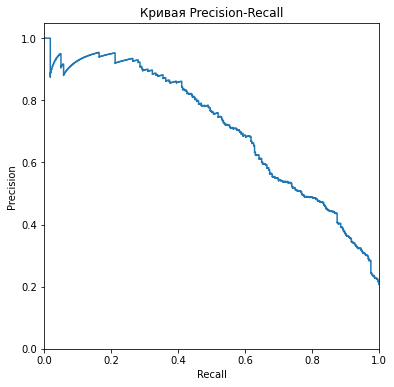

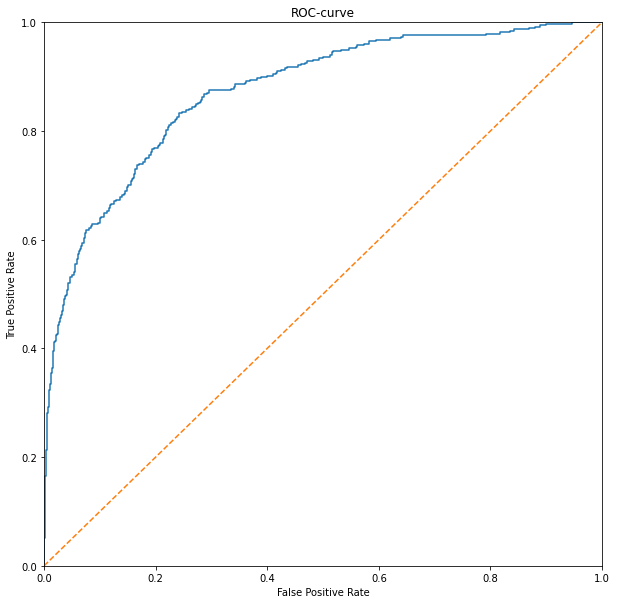

AUC = 0.872 | F1 = 0.579


In [12]:
plotAUC(model_rf, features_valid, target_valid)
plotResults(getMetrics(model_rf, features_valid, target_valid))

result_ls.append(["RandomForrest", getMetrics(model_rf, features_valid, target_valid)[1], 
                                   getMetrics(model_rf, features_valid, target_valid)[0]])

In [13]:
model_dt, best_d = best_dt(features_train, target_train, features_valid, target_valid, 13)      

print("Гиперпараметры лучшей модели - Глубина = {:.3f}".format(best_d))

Гиперпараметры лучшей модели - Глубина = 7.000


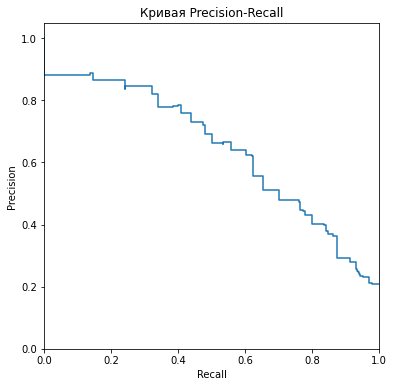

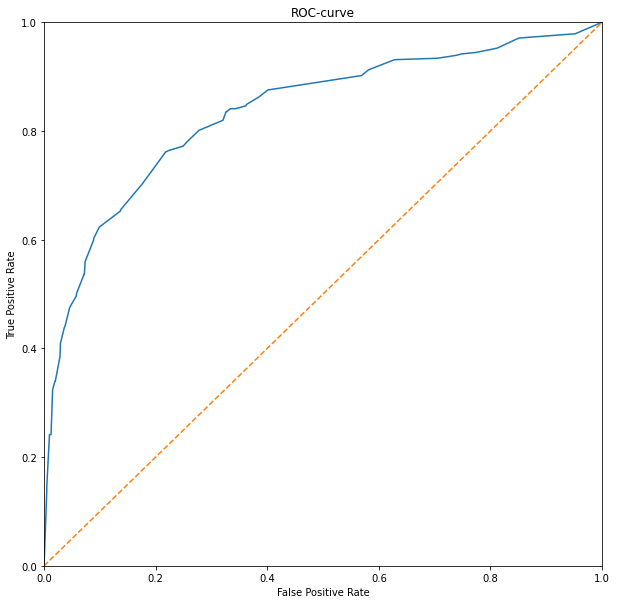

AUC = 0.835 | F1 = 0.576


In [14]:
plotAUC(model_dt, features_valid, target_valid)
plotResults(getMetrics(model_dt, features_valid, target_valid))

result_ls.append(["DesicionTree", getMetrics(model_dt, features_valid, target_valid)[1], 
                                  getMetrics(model_dt, features_valid, target_valid)[0]])

In [15]:
result_df = pd.DataFrame(result_ls, columns=['Model', 'AUC', 'F1'])
display(result_df)

,Model,AUC,F1
0,LogisticRegression,0.773536,0.304000
1,RandomForrest,0.872208,0.579216
2,DesicionTree,0.834605,0.576433


### Выводы

Показатели F1-меры не достаточны, это связано с дисбалансом таргета.

## Борьба с дисбалансом

### Увеличение выборки

In [16]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

#oversample = SMOTE(random_state=12345)
#features_train_up, target_train_up = oversample.fit_resample(features_train, target_train)

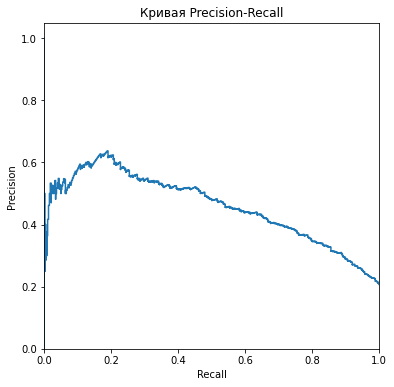

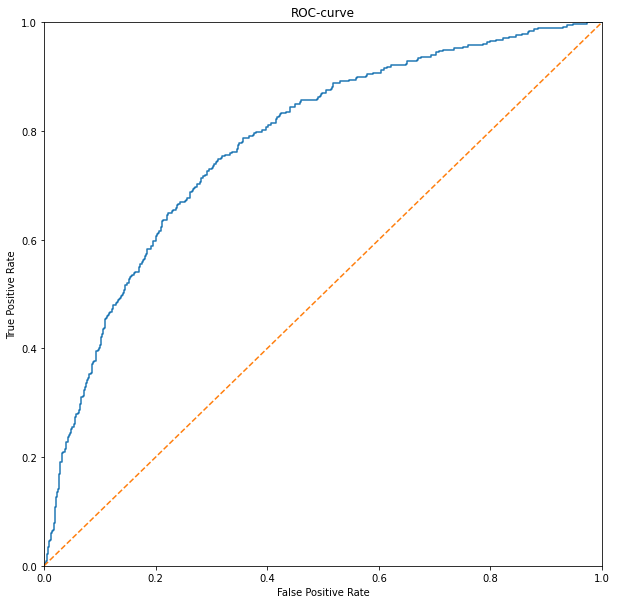

AUC = 0.778 | F1 = 0.507


In [17]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_lr.fit(features_upsampled, target_upsampled)

plotAUC(model_lr, features_valid, target_valid)
plotResults(getMetrics(model_lr, features_valid, target_valid))

result_ls.append(["LogisticRegressionUpsampled", getMetrics(model_lr, features_valid, target_valid)[1], 
                                        getMetrics(model_lr, features_valid, target_valid)[0]])

In [18]:
model_rf, best_d, best_e = best_rf(features_upsampled, target_upsampled, features_valid, target_valid, 13, 501)      

print("Гиперпараметры лучшей модели - Глубина леса = {:.3f}, Количество деревьев = {:.3f}".format(best_d, best_e))

Гиперпараметры лучшей модели - Глубина леса = 12.000, Количество деревьев = 400.000


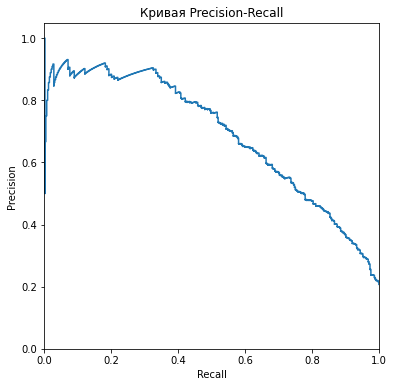

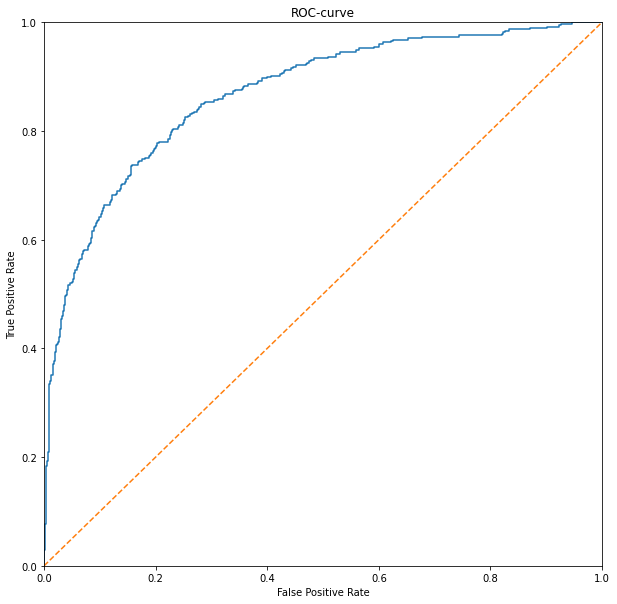

AUC = 0.867 | F1 = 0.637


In [19]:
plotAUC(model_rf, features_valid, target_valid)
plotResults(getMetrics(model_rf, features_valid, target_valid))

result_ls.append(["RandomForrestUpsampled", getMetrics(model_rf, features_valid, target_valid)[1], 
                                   getMetrics(model_rf, features_valid, target_valid)[0]])

In [20]:
model_dt, best_d = best_dt(features_upsampled, target_upsampled, features_valid, target_valid, 13)      

print("Гиперпараметры лучшей модели - Глубина = {:.3f}".format(best_d))

Гиперпараметры лучшей модели - Глубина = 5.000


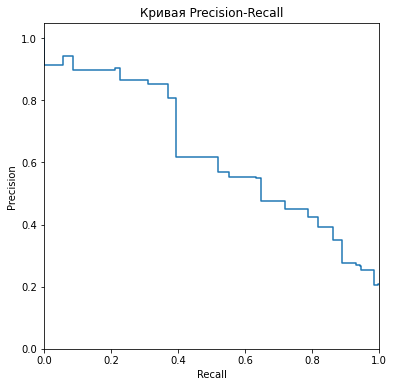

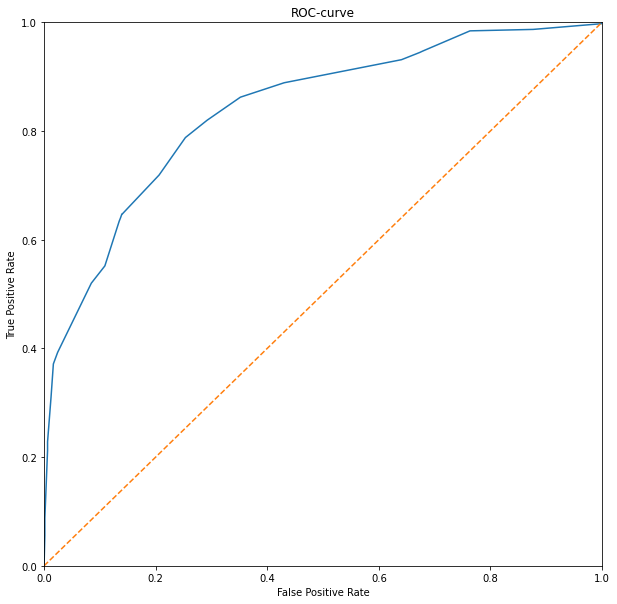

AUC = 0.840 | F1 = 0.574


In [21]:
plotAUC(model_dt, features_valid, target_valid)
plotResults(getMetrics(model_dt, features_valid, target_valid))

result_ls.append(["DesicionTreeUpsampled", getMetrics(model_dt, features_valid, target_valid)[1], 
                                  getMetrics(model_dt, features_valid, target_valid)[0]])

In [22]:
result_df = pd.DataFrame(result_ls, columns=['Model', 'AUC', 'F1'])
display(result_df)

,Model,AUC,F1
0,LogisticRegression,0.773536,0.304000
1,RandomForrest,0.872208,0.579216
2,DesicionTree,0.834605,0.576433
3,LogisticRegressionUpsampled,0.777945,0.507246
4,RandomForrestUpsampled,0.867459,0.637419
5,DesicionTreeUpsampled,0.839652,0.573545


### Уменьшение выборки

In [23]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

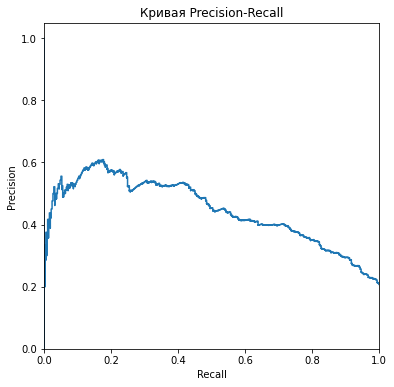

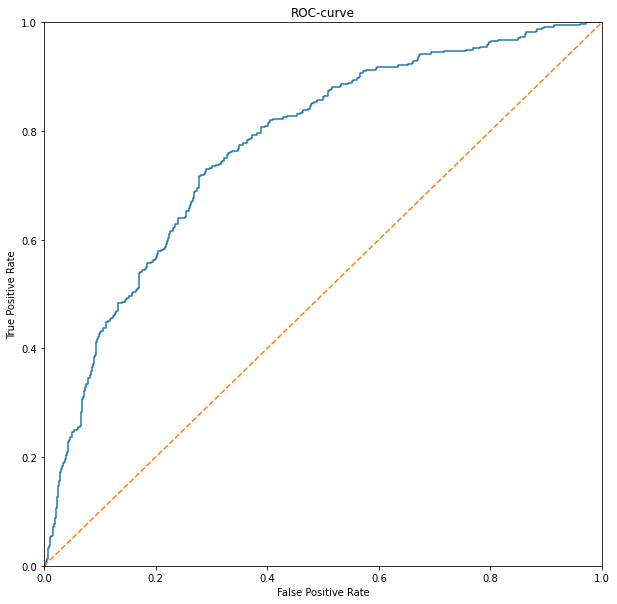

AUC = 0.771 | F1 = 0.416


In [24]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_lr.fit(features_downsampled, target_downsampled)

plotAUC(model_lr, features_valid, target_valid)
plotResults(getMetrics(model_lr, features_valid, target_valid))

result_ls.append(["LogisticRegressionDownsampled", getMetrics(model_lr, features_valid, target_valid)[1], 
                                        getMetrics(model_lr, features_valid, target_valid)[0]])

In [25]:
model_rf, best_d, best_e = best_rf(features_downsampled, target_downsampled, features_valid, target_valid, 13, 501)      

print("Гиперпараметры лучшей модели - Глубина леса = {:.3f}, Количество деревьев = {:.3f}".format(best_d, best_e))

Гиперпараметры лучшей модели - Глубина леса = 12.000, Количество деревьев = 300.000


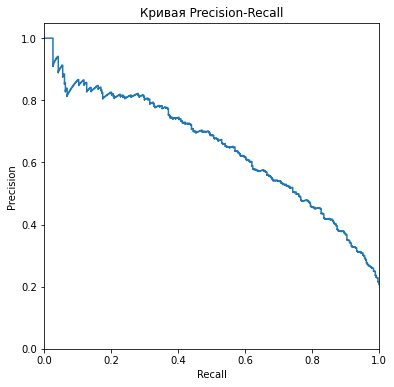

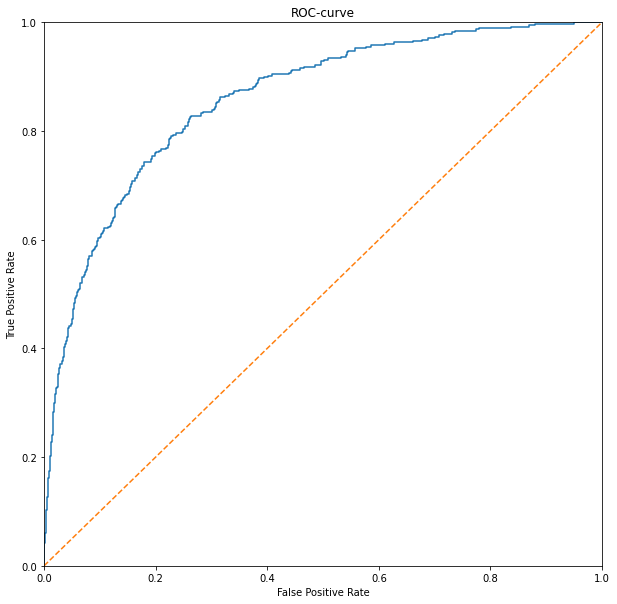

AUC = 0.858 | F1 = 0.466


In [26]:
plotAUC(model_rf, features_valid, target_valid)
plotResults(getMetrics(model_rf, features_valid, target_valid))

result_ls.append(["RandomForrestDownsampled", getMetrics(model_rf, features_valid, target_valid)[1], 
                                   getMetrics(model_rf, features_valid, target_valid)[0]])

In [27]:
model_dt, best_d = best_dt(features_downsampled, target_downsampled, features_valid, target_valid, 13)      

print("Гиперпараметры лучшей модели - Глубина = {:.3f}".format(best_d))

Гиперпараметры лучшей модели - Глубина = 5.000


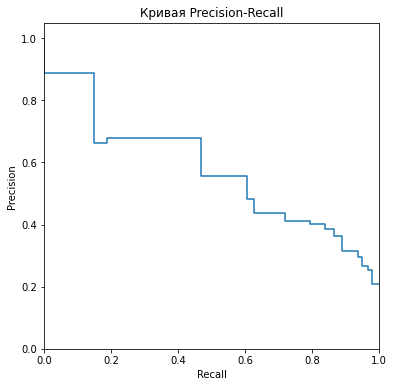

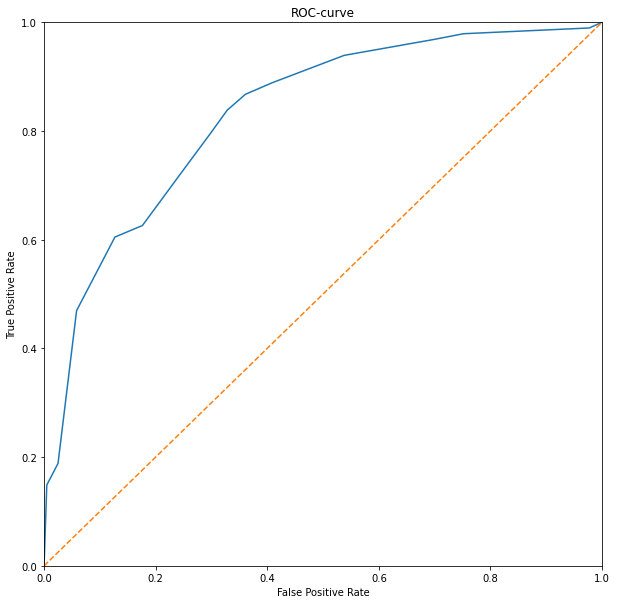

AUC = 0.831 | F1 = 0.515


In [28]:
plotAUC(model_dt, features_valid, target_valid)
plotResults(getMetrics(model_dt, features_valid, target_valid))

result_ls.append(["DesicionTreeDownsampled", getMetrics(model_dt, features_valid, target_valid)[1], 
                                  getMetrics(model_dt, features_valid, target_valid)[0]])

### Выводы

В ходе данного исследования были исследованны модели логической регрессии, решающего древа и случайного леса. Для каждой модели был произведен поиск оптимальных гиперпараметров. Также для борьбы с дисбалансом были исследованны техники увелечения и уменьшения выборок. Результаты приведены в таблице:

In [29]:
result_df = pd.DataFrame(result_ls, columns=['Model', 'AUC', 'F1'])
display(result_df)

,Model,AUC,F1
0,LogisticRegression,0.773536,0.304000
1,RandomForrest,0.872208,0.579216
2,DesicionTree,0.834605,0.576433
3,LogisticRegressionUpsampled,0.777945,0.507246
4,RandomForrestUpsampled,0.867459,0.637419
5,DesicionTreeUpsampled,0.839652,0.573545
6,LogisticRegressionDownsampled,0.771405,0.415677
7,RandomForrestDownsampled,0.857905,0.465931
8,DesicionTreeDownsampled,0.830563,0.514988


По полученным метрикам моделей видно, что наиболее оптимальной является модель случайного леса со следующими гиперпараметрами:
* Глубина леса = 12
* Количество деревьев = 400

Посмотрим на распределения порога данной модели.

In [30]:
model = RandomForestClassifier(random_state=12345, n_estimators=400, max_depth = 12)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f = f1_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 = {:.3f}".format(threshold, precision, recall, f))

Порог = 0.00 | Точность = 0.207, Полнота = 1.000, F1 = 0.344
Порог = 0.05 | Точность = 0.227, Полнота = 0.989, F1 = 0.369
Порог = 0.10 | Точность = 0.257, Полнота = 0.973, F1 = 0.407
Порог = 0.15 | Точность = 0.297, Полнота = 0.952, F1 = 0.453
Порог = 0.20 | Точность = 0.339, Полнота = 0.920, F1 = 0.495
Порог = 0.25 | Точность = 0.385, Полнота = 0.886, F1 = 0.537
Порог = 0.30 | Точность = 0.426, Полнота = 0.854, F1 = 0.568
Порог = 0.35 | Точность = 0.466, Полнота = 0.809, F1 = 0.592
Порог = 0.40 | Точность = 0.507, Полнота = 0.756, F1 = 0.607
Порог = 0.45 | Точность = 0.555, Полнота = 0.711, F1 = 0.623
Порог = 0.50 | Точность = 0.621, Полнота = 0.655, F1 = 0.637
Порог = 0.55 | Точность = 0.656, Полнота = 0.592, F1 = 0.622
Порог = 0.60 | Точность = 0.717, Полнота = 0.544, F1 = 0.618
Порог = 0.65 | Точность = 0.770, Полнота = 0.480, F1 = 0.592
Порог = 0.70 | Точность = 0.803, Полнота = 0.411, F1 = 0.544
Порог = 0.75 | Точность = 0.859, Полнота = 0.355, F1 = 0.503
Порог = 0.80 | Точность 

Результаты демонстрируют наибольшие метрики у модели случайного леса при пороге 0,5. Данная модель показала максимальные результаты, осталось только проверить ее на тестовых данных.

## Тестирование модели

Проведем тестирование модели с гиперпараметрами, которые были найдены в предыдущей главе, также используется техника upsampling и посмотрим метрики.

In [32]:
model = RandomForestClassifier(random_state=12345, 
                                           max_depth = 12,
                                           n_estimators=400)
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print('F1:', f1_score(target_test, predicted_test))
print('Recall:', recall_score(target_test, predicted_test))
print('Precison:', precision_score(target_test, predicted_test))
print('Accuracy:', accuracy_score(target_test, predicted_test))

F1: 0.601078167115903
Recall: 0.6353276353276354
Precison: 0.5703324808184144
Accuracy: 0.8372732270478285


Также проверим нашу модель на адекватность, с помощью сравнения модели с константой: 

In [33]:
target_const = target*0
acc_const = accuracy_score(target, target_const)

print("Accuracy:", acc_const)

Accuracy: 0.7960620393796062


Наша модель обладает большей точностью предсказания чем если бы таргет заменить константой.

В ходе работы были исследованны различные модели для предсказания оттока клиентов, применены разные способы борьбы с дисбалансом классов. В результате был выбран алгоритм случайного леса, со следующими параметрами:

* Глубина леса = 12
* Количество деревьев = 400

Обучение проводилось на увеличенной выборке.

Метрика F1 = 0,6 свидетельствует, что модель достаточно точно (63% правильных результатов) предсказывает отток клиентов из "Бета-Банка". 